In [1]:
import datetime as dt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
from google.colab import files
from pandas import ExcelWriter as ew
from pandas import ExcelFile as ef
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving dataset.csv to dataset.csv


In [6]:
df = pd.read_csv('dataset.csv') 

In [7]:
df.shape  

(50000, 19)

In [8]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [9]:
df.columns 

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [10]:
df.describe() 

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


In [11]:
df.head() 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


In [12]:
df.isnull().sum() / df.shape[0] * 100 

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64

In [13]:
df[["invoice_id", "doc_id"]] 

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


In [14]:
(df['document_create_date.1'] == df['document_create_date']).sum()
 

21232

In [15]:
if(df["posting_id"].nunique()):
  print("Posting Id is a constant column")
else:
  print("Posting Id is not a constant column")

Posting Id is a constant column


In [16]:
df["isOpen"].nunique() 

2

In [17]:
cols_to_drop = ["area_business", "posting_id", "invoice_id", "document_create_date", "isOpen", "document type",
        "document_create_date.1"]
df.drop(cols_to_drop, axis=1, inplace=True)

In [18]:
df.columns 

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

In [19]:
df[df.duplicated(keep='first')]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


In [20]:
df.duplicated().sum()

1161

In [21]:
df.drop_duplicates(keep='first', inplace=True)

In [22]:
df.duplicated().sum() 

0

In [23]:
df.shape 

(48839, 12)

In [24]:
df.isnull().sum() 

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

In [25]:
df.dtypes 

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

In [26]:
df[["clear_date", "posting_date", "due_in_date", "baseline_create_date"]].dtypes

clear_date               object
posting_date             object
due_in_date             float64
baseline_create_date    float64
dtype: object

In [27]:
df['due_in_date'] = df['due_in_date'].astype(np.int64)
df['baseline_create_date'] = df['baseline_create_date'].astype(np.int64)
df['due_in_date'] = df['due_in_date'].astype(str)
df['baseline_create_date'] = df['baseline_create_date'].astype(str)

col_to_date = ['baseline_create_date','due_in_date','clear_date','posting_date']
for x in col_to_date:
    df[x] = pd.to_datetime(df[x],format='%Y-%m-%d')

In [28]:
df[["clear_date", "posting_date", "due_in_date", "baseline_create_date"]].dtypes

clear_date              datetime64[ns]
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
baseline_create_date    datetime64[ns]
dtype: object

In [29]:
df["invoice_currency"].value_counts() 

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

In [30]:
df[["total_open_amount"]] 

,total_open_amount
0,54273.28
1,79656.60
2,2253.86
3,3299.70
4,33133.29
...,...
49995,3187.86
49996,6766.54
49997,6120.86
49998,63.48


In [31]:
df['converted_usd'] = np.where(df['invoice_currency'] == 'CAD', df['total_open_amount'] * 0.7, df['total_open_amount']) 

In [32]:
df[['converted_usd']] 

,converted_usd
0,54273.28
1,79656.60
2,2253.86
3,2309.79
4,33133.29
...,...
49995,3187.86
49996,6766.54
49997,6120.86
49998,63.48


In [33]:
df["buisness_year"].value_counts() 

2019.0    33975
2020.0    14864
Name: buisness_year, dtype: int64

In [34]:
df.drop(['invoice_currency', 'total_open_amount'], axis=1, inplace=True) 

In [35]:
df.columns 

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd'],
      dtype='object')

In [36]:
df.isnull().sum() 

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
baseline_create_date       0
cust_payment_terms         0
converted_usd              0
dtype: int64

In [37]:
df['clear_date'].isna().sum() 

9681

In [38]:
nulldata = df.loc[df['clear_date'].isnull()]
maindata = df.loc[df['clear_date'].isnull()==False]
maindata = maindata.reset_index(drop=True)

In [39]:
maindata.shape 

(39158, 11)

In [40]:
nulldata.shape 

(9681, 11)

In [41]:
maindata.head() 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
3,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
4,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [42]:
nulldata.head() 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


In [43]:
maindata["Delay"] = maindata["clear_date"] - maindata["due_in_date"]

In [44]:
groupdf= pd.DataFrame(maindata.groupby('name_customer')['Delay'].mean(numeric_only=False))

groupdf.rename(columns={'Delay': 'avg_Delay'}, inplace=True)

In [45]:
maindata["avg_delay"] = maindata["name_customer"].map(groupdf['avg_Delay']) 

In [46]:
maindata["avg_delay"] = maindata["avg_delay"] / np.timedelta64(1, 's')
maindata["avg_delay"].head()

0   -2.334702e+05
1    1.641600e+06
2    6.990545e+05
3   -1.887923e+05
4    6.172800e+06
Name: avg_delay, dtype: float64

In [47]:
maindata.head() 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-2.334702e+05
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,1.641600e+06
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,6.990545e+05
3,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-1.887923e+05
4,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,6.172800e+06


In [48]:
maindata.drop(['Delay', 'clear_date'], axis=1, inplace=True)
maindata.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,U001,0200769623,WAL-MAR corp,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,-2.334702e+05
1,U001,0200980828,BEN E,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,1.641600e+06
2,U001,0200792734,MDV/ trust,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,6.990545e+05
3,U001,0200769623,WAL-MAR foundation,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-1.887923e+05
4,CA02,0140106181,THE corporation,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,6.172800e+06


In [49]:
X = maindata.drop(['avg_delay'], axis=1)

In [50]:
y = maindata['avg_delay']

In [51]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X, y, test_size=0.4)

In [52]:
print(X_train.shape)
print(X_loc_test.shape)
print(y_train.shape)
print(y_loc_test.shape)

(23494, 10)
(15664, 10)
(23494,)
(15664,)


In [53]:
X_val, X_test, y_val, y_test = train_test_split(X_loc_test, y_loc_test, test_size=0.5)

In [54]:
print(X_val.shape)
print(X_test.shape)
print(y_val.shape)
print(y_test.shape)

(7832, 10)
(7832, 10)
(7832,)
(7832,)


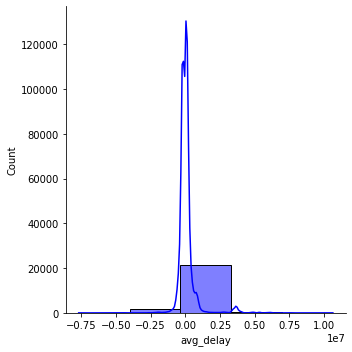

In [55]:
sns.displot(data=y_train, kde=True, color='blue', bins=5)

In [56]:
x_train = X_train.groupby(by=["name_customer"], as_index=False)["doc_id"].count()
x_train.head()

,name_customer,doc_id
0,17135 associates,1
1,17135 llc,1
2,99 CE,2
3,99 CE associates,1
4,99 CE co,1


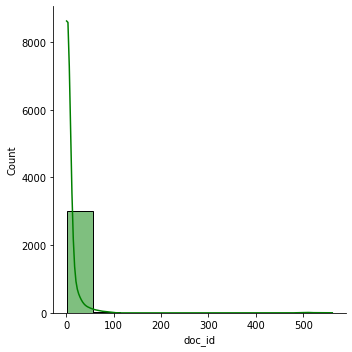

In [57]:
sns.displot(data=x_train, x="doc_id", kde=True, color='green', bins=10)

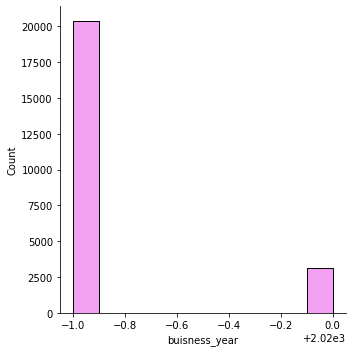

In [58]:
sns.displot(data=X_train, x="buisness_year", kde=False, color='violet', bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: The following kwargs were not used by contour: 'bins'
  **contour_kws,


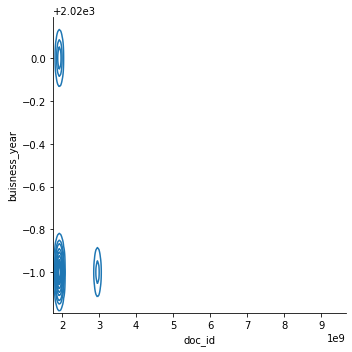

In [59]:
sns.displot(data=X_train, x="doc_id", y="buisness_year", kind='kde', bins=5)

In [60]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
37517,U001,0200726979,BJ'S trust,2019.0,1.930002e+09,2019-10-13,2019-10-28,2019-10-13,NAA8,58.45
24351,U001,0200759878,SA llc,2019.0,1.929460e+09,2019-06-11,2019-06-26,2019-06-11,NAH4,43628.35
2758,U001,CCCA02,KRAFT in,2019.0,1.929547e+09,2019-06-28,2019-08-02,2019-06-28,NAG2,16043.28
32299,U001,0200775094,SAVE M associates,2019.0,1.929317e+09,2019-05-14,2019-05-29,2019-05-14,NAA8,85529.74
30009,U001,0200762301,C&S WH foundation,2019.0,1.928626e+09,2019-01-15,2019-01-30,2019-01-15,NAC6,24910.10
...,...,...,...,...,...,...,...,...,...,...
17390,U001,0200769623,WAL-MAR corp,2020.0,1.930538e+09,2020-02-19,2020-03-05,2020-02-19,NAH4,22410.91
23453,U001,0200769623,WAL-MAR co,2019.0,1.929862e+09,2019-09-11,2019-09-26,2019-09-11,NAH4,54230.18
19762,U001,0200508557,FOODL associates,2019.0,1.930002e+09,2019-10-22,2019-11-06,2019-10-22,NAA8,5091.04
30989,U001,0200762301,C&S WH foundation,2020.0,1.930344e+09,2020-01-03,2020-01-18,2020-01-03,NAC6,64112.14


In [61]:
X_train.describe() 

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.132417,2.012370e+09,30398.107803
std,0.338951,2.859821e+08,35986.190599
min,2019.000000,1.928502e+09,0.790000
25%,2019.000000,1.929176e+09,4504.892500
50%,2019.000000,1.929732e+09,16754.941000
75%,2019.000000,1.930207e+09,44943.525000
max,2020.000000,9.500000e+09,668593.360000


In [62]:
from sklearn.preprocessing import LabelEncoder

business_coder = LabelEncoder()
business_coder.fit(X_train["business_code"])

LabelEncoder()

In [63]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code']) 

In [64]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

In [65]:
X_train[["business_code", "business_code_enc"]] 

,business_code,business_code_enc
37517,U001,1
24351,U001,1
2758,U001,1
32299,U001,1
30009,U001,1
...,...,...
17390,U001,1
23453,U001,1
19762,U001,1
30989,U001,1


In [66]:
def custom(col, traindf=X_train, valdf=X_val, testdf=X_test):
    traindf.drop(col, axis=1, inplace=True)
    valdf.drop(col, axis=1, inplace=True)
    testdf.drop(col, axis=1, inplace=True)

    return traindf, valdf, testdf

In [67]:
X_train, X_val, X_test = custom(['business_code']) 

In [68]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA', "1").str.replace('CCU', "2").str.replace('CC', "3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA', "1").str.replace('CCU', "2").str.replace('CC', "3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA', "1").str.replace('CCU', "2").str.replace('CC', "3").astype(int)

In [69]:
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self

    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x == unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

In [70]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc'] = label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc'] = label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc'] = label_encoder.transform(X_test['name_customer'])

In [71]:
X_train, X_val, X_test = custom(['name_customer']) 

In [72]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc'] = label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc'] = label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc'] = label_encoder1.transform(X_test['cust_payment_terms'])

In [73]:
X_train, X_val, X_test = custom(['cust_payment_terms']) 

In [74]:
X_train.dtypes 

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [75]:
X_test.dtypes 

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [76]:
X_val.dtypes 

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [77]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year

X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year

In [78]:
X_train, X_val, X_test = custom(['posting_date']) 

In [79]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year

In [80]:
X_train, X_val, X_test = custom(['baseline_create_date']) 

In [81]:
X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year

X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

In [82]:
X_train, X_val, X_test = custom(['due_in_date']) 

In [83]:
X_train.dtypes 

cust_number                 int64
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [84]:
X_test.dtypes 

cust_number                 int64
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [85]:
X_val.dtypes 

cust_number                 int64
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [86]:
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

In [87]:
constant_columns = [column for column in X_train.columns if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


In [88]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


In [89]:
def handling_correlation(X_train, threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [90]:
train = X_train.copy()
handling_correlation(train.copy(), threshold=0.85)

['day_of_createdate',
 'year_of_createdate',
 'month_of_due',
 'year_of_due',
 'year_of_postingdate',
 'month_of_createdate']

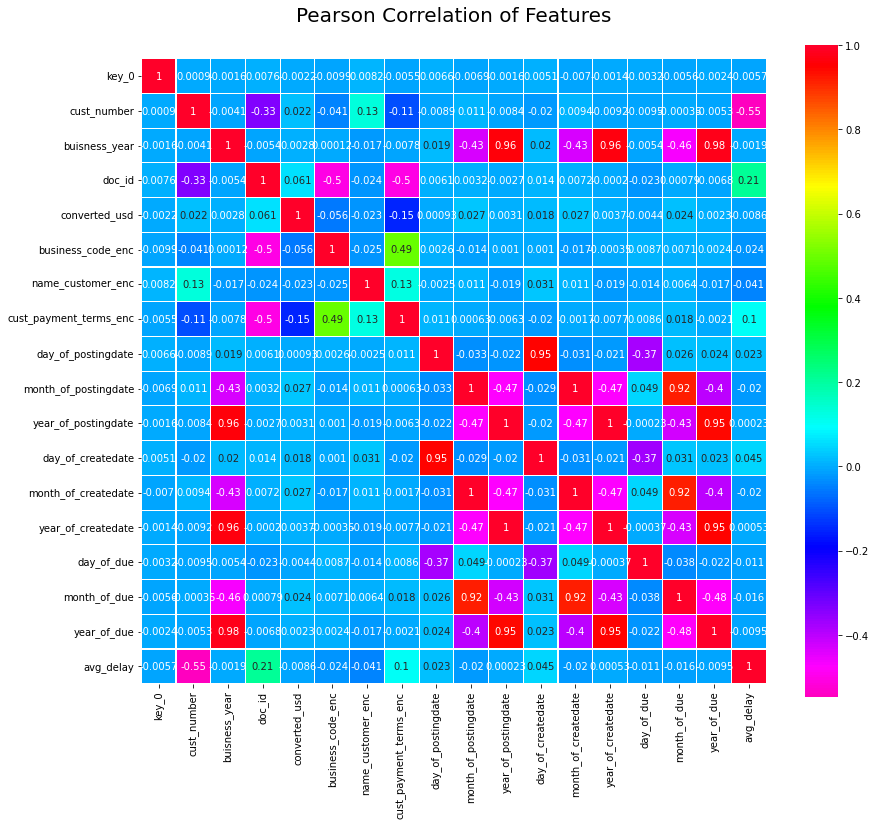

In [91]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train, on=X_train.index).corr(), linewidths=0.1, vmax=1.0,
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

In [92]:
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [93]:
sel.variances_ 

array([1.83841393e+15, 1.14882582e-01, 8.17822887e+16, 1.29495079e+09,
       2.80848966e-01, 1.05036271e+06, 1.33791213e+02, 7.56792074e+01,
       1.22670029e+01, 1.15308916e-01, 7.73385443e+01, 1.22707884e+01,
       1.15415799e-01, 7.65162200e+01, 1.20739352e+01, 1.18295176e-01])

In [94]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [95]:
from sklearn.linear_model import LinearRegression

Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [96]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [97]:
predict_test = regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

562308.2986453916

In [98]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression'],[297912862110.7292],[0.30975828925501303],

In [99]:
from sklearn.svm import SVR
Algorithm.append('SVR')
regressor = SVR()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [100]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [101]:
predict_test = regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

685893.3575110285

In [102]:
for i in Algorithm, MSE_Score, R2_Score:
     print(i, end=',')

['LinearRegression', 'SVR'],[297912862110.7292, 434419401666.1078],[0.30975828925501303, -0.006517103230598398],

In [103]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreRegressor')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [104]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [105]:
predict_test = regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

423553.6978970509

In [106]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'SVR', 'DecisionTreRegressor'],[297912862110.7292, 434419401666.1078, 189076197508.93048],[0.30975828925501303, -0.006517103230598398, 0.5619246611070674],

In [107]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegressor')
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [108]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [109]:
predict_test = regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

352150.6252072934

In [110]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',') 

['LinearRegression', 'SVR', 'DecisionTreRegressor', 'RandomForestRegressor'],[297912862110.7292, 434419401666.1078, 189076197508.93048, 125362979616.65607],[0.30975828925501303, -0.006517103230598398, 0.5619246611070674, 0.7095433983561019],

In [111]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

[20:36:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [112]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [113]:
predict_test = regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

381587.6662889515

In [114]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'SVR', 'DecisionTreRegressor', 'RandomForestRegressor', 'XGB Regressor'],[297912862110.7292, 434419401666.1078, 189076197508.93048, 125362979616.65607, 142776192631.22656],[0.30975828925501303, -0.006517103230598398, 0.5619246611070674, 0.7095433983561019, 0.6691982925570894],

In [115]:
comparison = pd.DataFrame(data = {"Algorithm": Algorithm, "MSE_Score": MSE_Score, "R2_Score": R2_Score})
comparison.head()

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,2.979129e+11,0.309758
1,SVR,4.344194e+11,-0.006517
2,DecisionTreRegressor,1.890762e+11,0.561925
3,RandomForestRegressor,1.253630e+11,0.709543
4,XGB Regressor,1.427762e+11,0.669198


In [116]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

[20:37:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [117]:
mean_squared_error(y_test, predictedfinal, squared=False) 

377857.3707514868

In [118]:
mean_squared_error(y_val, predict_testfinal, squared=False) 

381587.6662889515

In [119]:
r2_score(y_test, predictedfinal) 

0.6691982925570894

In [120]:
r2_score(y_val, predict_testfinal) 

0.6880404524735708

In [121]:
regressorfinal.score(X_train, y_train) 

0.7690381372312495

In [122]:
regressorfinal.score(X_val, y_val) 

0.6880404524735708

In [123]:
regressorfinal.score(X_test, y_test) 

0.6691982925570894

In [124]:
nulldata.head() 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


In [125]:
nulldata.shape 

(9681, 11)

In [126]:
nulldata.describe() 

,buisness_year,doc_id,converted_usd
count,9681.0,9.681000e+03,9681.000000
mean,2020.0,2.006165e+09,32065.681125
std,0.0,2.673629e+08,35419.613688
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930658e+09,5607.190000
50%,2020.0,1.930731e+09,19024.190000
75%,2020.0,1.930818e+09,47752.640000
max,2020.0,2.960636e+09,653644.800000


In [127]:
nulldata.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9681 non-null   object        
 1   cust_number           9681 non-null   object        
 2   name_customer         9681 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9681 non-null   float64       
 5   doc_id                9681 non-null   float64       
 6   posting_date          9681 non-null   datetime64[ns]
 7   due_in_date           9681 non-null   datetime64[ns]
 8   baseline_create_date  9681 non-null   datetime64[ns]
 9   cust_payment_terms    9681 non-null   object        
 10  converted_usd         9681 non-null   float64       
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 907.6+ KB


In [128]:
nulldata1 = nulldata.copy() 

In [129]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [130]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA', "1").str.replace('CCU', "2").str.replace('CC',"3").astype(int) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [131]:
nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year

nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [132]:
nulldata.head() 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,business_code_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_due,month_of_due,year_of_due,day_of_cleardate,month_of_cleardate,year_of_cleardate,day_of_createdate,month_of_createdate,year_of_createdate
3,CA02,140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,0,30,3,2020,10,4,2020,NaN,NaN,NaN,31,3,2020
7,U001,200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,1,19,3,2020,3,4,2020,NaN,NaN,NaN,19,3,2020
10,U001,200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,1,11,3,2020,26,3,2020,NaN,NaN,NaN,11,3,2020
14,U001,200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,1,15,4,2020,30,4,2020,NaN,NaN,NaN,15,4,2020
15,U001,200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,1,23,4,2020,26,4,2020,NaN,NaN,NaN,16,4,2020


In [133]:
nulldata['cust_payment_terms_enc'] = label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc'] = label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc'] = label_encoder.transform(nulldata['name_customer'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [134]:
nulldata.dtypes 

business_code                     object
cust_number                        int64
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
cust_payment_ter

In [135]:
cols_to_drop = ['business_code', "baseline_create_date", "due_in_date", "posting_date", "name_customer", "clear_date", "cust_payment_terms",'day_of_cleardate', "month_of_cleardate", "year_of_cleardate"]
nulldata.drop(cols_to_drop, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [136]:
nulldata.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int64  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int64  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

In [137]:
nulldata.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int64  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int64  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

In [138]:
X_test.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 1347 to 31362
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             7832 non-null   int64  
 1   buisness_year           7832 non-null   float64
 2   doc_id                  7832 non-null   float64
 3   converted_usd           7832 non-null   float64
 4   business_code_enc       7832 non-null   int64  
 5   name_customer_enc       7832 non-null   int64  
 6   cust_payment_terms_enc  7832 non-null   int64  
 7   day_of_postingdate      7832 non-null   int64  
 8   month_of_postingdate    7832 non-null   int64  
 9   year_of_postingdate     7832 non-null   int64  
 10  day_of_createdate       7832 non-null   int64  
 11  month_of_createdate     7832 non-null   int64  
 12  year_of_createdate      7832 non-null   int64  
 13  day_of_due              7832 non-null   int64  
 14  month_of_due            7832 non-nul

In [139]:
X_test.columns 

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [140]:
nulldata.columns 

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [141]:
nulldata2 = nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
                      'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
                      'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
                      'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
                      'day_of_due', 'month_of_due', 'year_of_due']]

In [142]:
nulldata2.head() 

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020.0,2.960623e+09,2309.79,66,2696,5,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020.0,1.930659e+09,11173.02,66,2777,20,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020.0,1.930611e+09,3525.59,66,90,20,11,3,2020,11,3,2020,26,3,2020
14,200739534,2020.0,1.930788e+09,121105.65,66,2003,20,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020.0,1.930817e+09,3726.06,66,719,36,23,4,2020,16,4,2020,26,4,2020


In [143]:
final_result = regressorfinal.predict(nulldata2) 

In [144]:
final_result = pd.Series(final_result, name='avg_delay') 

In [145]:
final_result 

0       374290.687500
1       412242.687500
2        -5196.337402
3       130689.781250
4      -264319.500000
            ...      
9676    128954.656250
9677    128954.656250
9678   -217846.625000
9679    196497.906250
9680    -12872.713867
Name: avg_delay, Length: 9681, dtype: float32

In [146]:
nulldata1.reset_index(drop=True, inplace=True)
Final = nulldata1.merge(final_result, on=nulldata.index)

In [147]:
Final.head() 

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,374290.687500
1,7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,412242.687500
2,10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,-5196.337402
3,14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,130689.781250
4,15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,-264319.500000


In [148]:
Final.columns 

Index(['key_0', 'business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd',
       'avg_delay'],
      dtype='object')

In [149]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s') 

In [150]:
Final['clear_date'] 

0      2020-04-14 07:58:10.687500000
1      2020-04-07 18:30:42.687500000
2      2020-03-25 22:33:23.662597656
3      2020-05-01 12:18:09.781250000
4      2020-04-22 22:34:40.500000000
                    ...             
9676   2020-03-26 11:49:14.656250000
9677   2020-05-19 11:49:14.656250000
9678   2020-03-23 11:29:13.375000000
9679   2020-04-11 06:34:57.906250000
9680   2020-05-05 20:25:27.286132812
Name: clear_date, Length: 9681, dtype: datetime64[ns]

In [151]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay // (24 * 3600), axis=1) 


In [152]:
Final['avg_delay'] 

0       4.0
1       4.0
2      -1.0
3       1.0
4      -4.0
       ... 
9676    1.0
9677    1.0
9678   -3.0
9679    2.0
9680   -1.0
Name: avg_delay, Length: 9681, dtype: float64

In [153]:
bins = [0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

In [154]:
Final.drop(['key_0',"avg_delay"], axis=1, inplace=True) 

In [155]:
Final['Aging Bucket'].value_counts() 

0-15               8445
31-45                66
46-60                 4
16-30                 2
Greatar than 60       0
Name: Aging Bucket, dtype: int64

In [156]:
Final 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,0140105686,SYSC llc,2020-04-14 07:58:10.687500000,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,0-15
1,U001,0200744019,TARG us,2020-04-07 18:30:42.687500000,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,0-15
2,U001,0200418007,AM,2020-03-25 22:33:23.662597656,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,NaN
3,U001,0200739534,OK systems,2020-05-01 12:18:09.781250000,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,0-15
4,U001,0200353024,DECA corporation,2020-04-22 22:34:40.500000000,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9676,U001,0200769623,WAL-MAR in,2020-03-26 11:49:14.656250000,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99,0-15
9677,U001,0200769623,WAL-MAR corporation,2020-05-19 11:49:14.656250000,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71,0-15
9678,U001,0200148860,DOLLA co,2020-03-23 11:29:13.375000000,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06,NaN
9679,U001,0200900909,SYSCO co,2020-04-11 06:34:57.906250000,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64,0-15


In [157]:
Final.to_csv("Final-HRC62156WK.csv") 